In [1]:
library("limma")
library("edgeR")

In [2]:
source("/ufrc/soltis/shan158538/TragFL_NewAnalysis/SLURM/rnaseq_plot_funcs.R")
# source causes R to accept its input from the named file

In [3]:
setwd('/ufrc/soltis/shan158538/TragFL_NewAnalysis/OutPut/DE_analysis/Tdu_Tpr_voom_Tml')
# set working directory in R

In [4]:
targets <- readTargets()
# the default file to be read here is Traget.txt

In [5]:
print(targets)

                            files group description
1 both_counts_Tdu_1_2_Tdu_Tpr.csv   Tdu       Tdu_1
2 both_counts_Tdu_2_2_Tdu_Tpr.csv   Tdu       Tdu_2
3 both_counts_Tdu_3_2_Tdu_Tpr.csv   Tdu       Tdu_3
4 both_counts_Tpr_1_2_Tdu_Tpr.csv   Tpr       Tpr_1
5 both_counts_Tpr_2_2_Tdu_Tpr.csv   Tpr       Tpr_2
6 both_counts_Tpr_3_2_Tdu_Tpr.csv   Tpr       Tpr_3


In [6]:
d <- readDGE(targets, sep=",")
# readDGE: Reads and merges a set of text files containing gene expression counts

In [7]:
print(dim(d))
# dim: Retrieve or set the dimension of an object

[1] 11864     6


In [8]:
colnames(d) <- c("Tdu_1","Tdu_2","Tdu_3","Tpr_1","Tpr_2","Tpr_3")

In [9]:
printHead(d)

$samples
                                files group description lib.size norm.factors
Tdu_1 both_counts_Tdu_1_2_Tdu_Tpr.csv   Tdu       Tdu_1   976225            1
Tdu_2 both_counts_Tdu_2_2_Tdu_Tpr.csv   Tdu       Tdu_2  1243376            1
Tdu_3 both_counts_Tdu_3_2_Tdu_Tpr.csv   Tdu       Tdu_3  1365966            1
Tpr_1 both_counts_Tpr_1_2_Tdu_Tpr.csv   Tpr       Tpr_1   800814            1
Tpr_2 both_counts_Tpr_2_2_Tdu_Tpr.csv   Tpr       Tpr_2  1454907            1
Tpr_3 both_counts_Tpr_3_2_Tdu_Tpr.csv   Tpr       Tpr_3   708250            1

$counts
                                                      Samples
Tags                                                   Tdu_1 Tdu_2 Tdu_3 Tpr_1
  Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1     92   109   123   103
  Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5    157   218   281   204
  Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1    36    64    58    21
  Tpr_TRINITY_DN1451_c0_g1|Tdu_TRINITY_DN16990_c3_g1      

In [10]:
keep <- rowSums(cpm(d) > cpm(10,mean(d$samples$lib.size))[1]) >= 3
# rowSums: sum values of Raster objects by row or column
# cpm: Computes counts per million (CPM)
# The $ allows you extract elements by name

# ">= 3" means have to meet the condidtion in as least 3 samples. This is because there are 3 replciates per species
# Following the method from [Chen et al., (2016)](https://f1000research.com/articles/5-1438/v2)

In [11]:
d <- d[keep,, keep.lib.sizes=FALSE]

# keep.lib.sizes=FALSE causes the library sizes to be recomputed after the filtering

In [12]:
printHead(d)

$samples
                                files group description lib.size norm.factors
Tdu_1 both_counts_Tdu_1_2_Tdu_Tpr.csv   Tdu       Tdu_1   963881            1
Tdu_2 both_counts_Tdu_2_2_Tdu_Tpr.csv   Tdu       Tdu_2  1229499            1
Tdu_3 both_counts_Tdu_3_2_Tdu_Tpr.csv   Tdu       Tdu_3  1349311            1
Tpr_1 both_counts_Tpr_1_2_Tdu_Tpr.csv   Tpr       Tpr_1   791750            1
Tpr_2 both_counts_Tpr_2_2_Tdu_Tpr.csv   Tpr       Tpr_2  1438687            1
Tpr_3 both_counts_Tpr_3_2_Tdu_Tpr.csv   Tpr       Tpr_3   700913            1

$counts
                                                      Samples
Tags                                                   Tdu_1 Tdu_2 Tdu_3 Tpr_1
  Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1     92   109   123   103
  Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5    157   218   281   204
  Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1    36    64    58    21
  Tpr_TRINITY_DN1451_c0_g1|Tdu_TRINITY_DN16990_c3_g1      

In [13]:
print(dim(d))

[1] 8248    6


# After removing low counts orthologs, there are 8,248 left

In [14]:
pdf("boxplot_log-CPM.pdf")
# starts the graphics device driver for producing PDF graphics

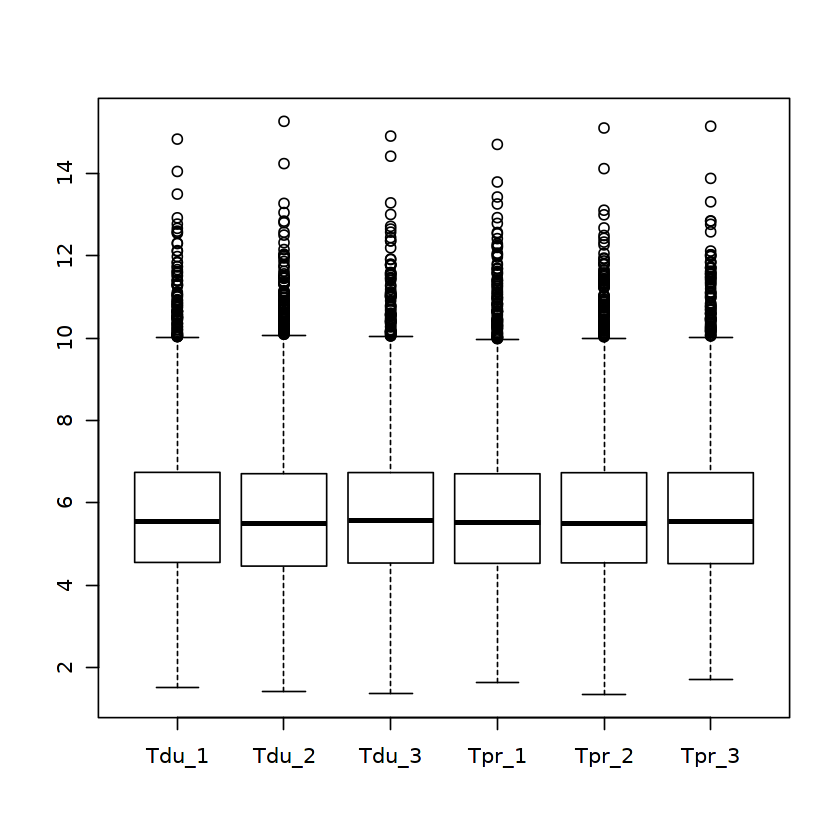

In [15]:
boxplot(cpm(d$counts + 1, log=TRUE))
# boxplot: Produce box-and-whisker plot(s) of the given (grouped) values
# log: character indicating if x or y or both coordinates should be plotted in log scale.

In [16]:
dev.off()
# This function closes the specified plot (by default the current device) and if it is an imguR device, uploads the plots for web hosting

pdf 
  3

In [17]:
trt = factor(c(1,1,1,2,2,2), labels=c("Tdu","Tpr"))
# factor: The function factor is used to encode a vector as a factor
# lables: an optional character vector of labels for the levels

In [18]:
printHead(trt)

[1] Tdu Tdu Tdu Tpr Tpr Tpr
Levels: Tdu Tpr


In [19]:
design=model.matrix(~0 + trt)
# model.matrix creates a design (or model) matrix, e.g., by expanding factors to a set of dummy variables (depending on the contrasts) and expanding interactions similarly.

In [20]:
printHead(design)

  trtTdu trtTpr
1      1      0
2      1      0
3      1      0
4      0      1
5      0      1
6      0      1
attr(,"assign")
[1] 1 1
attr(,"contrasts")
attr(,"contrasts")$trt
[1] "contr.treatment"



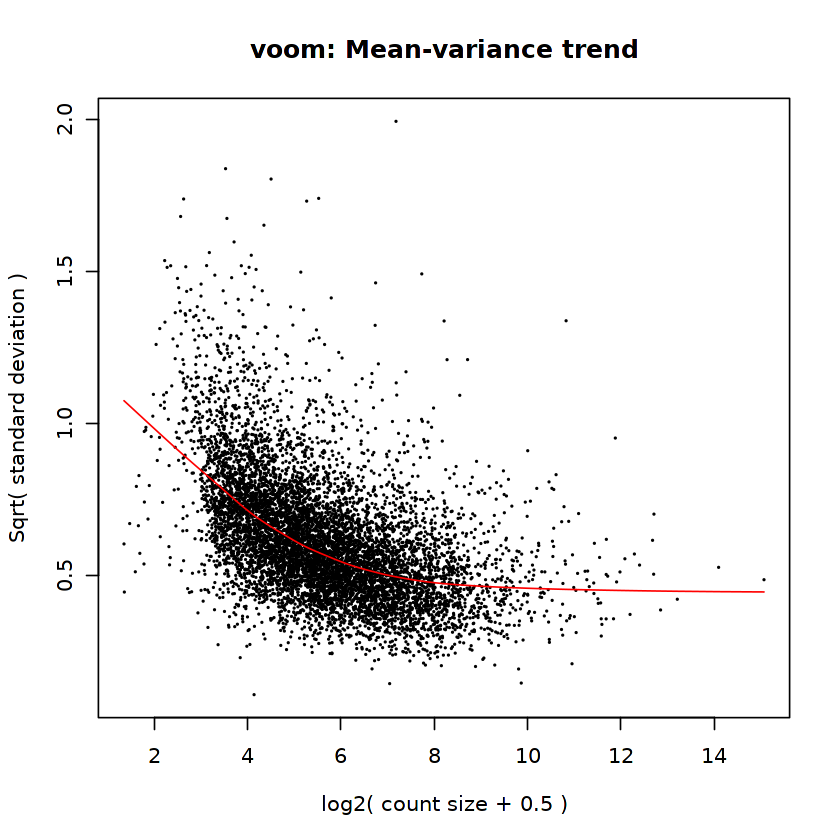

In [21]:
voom=voom(d, design, plot=TRUE)
# voom: This function is intended to process RNA-Seq or ChIP-Seq data prior to linear modelling in limma.
# The key concern is to estimate the mean-variance relationship in the data, then use this to compute appropriate weights for each observation. Count data almost show non-trivial mean-variance relationships. Raw counts show increasing variance with increasing count size, while log-counts typically show a decreasing mean-variance trend.
# Transform count data to log2-counts per million (logCPM), estimate the mean-variance relationship and use this to compute appropriate observational-level weights. The data are then ready for linear modelling.

In [22]:
write.table(voom$E, "voom_expression_values_min10_3rep.txt", sep="\t", quote=F, row.names = TRUE)
# write.table prints its required argument x to a file
# quote: If FALSE, nothing is quoted.

In [23]:
fit = lmFit(voom, design)
# lmFit: Fit linear model for each gene given a series of arrays

In [24]:
printHead(fit)

$coefficients
                                                       trtTdu   trtTpr
Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1  6.523545 6.918903
Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5  7.514999 8.111918
Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1 5.475325 4.465863
Tpr_TRINITY_DN1451_c0_g1|Tdu_TRINITY_DN16990_c3_g1   6.737632 7.324402
Tpr_TRINITY_DN10853_c1_g4|Tdu_TRINITY_DN21860_c3_g3  9.650411 9.883337
8243 more rows ...

$stdev.unscaled
                                                        trtTdu    trtTpr
Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1  0.1504733 0.1496182
Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5  0.1340647 0.1317447
Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1 0.1840548 0.2534399
Tpr_TRINITY_DN1451_c0_g1|Tdu_TRINITY_DN16990_c3_g1   0.1461013 0.1416006
Tpr_TRINITY_DN10853_c1_g4|Tdu_TRINITY_DN21860_c3_g3  0.1216319 0.1220077
8243 more rows ...

$sigma
[1] 0.3246624 0.6138145 0.7801527 0.6253610 0.5850928
8243 

In [25]:
overall_model <- eBayes(fit)
# eBayes: Empirical Bayes Statistics For Differential Expression
# Given a microarray linear model fit, compute moderated t-statistics, moderated F-statistic, and log-odds of differential expression by empirical Bayes moderation of the standard errors towards a common value.

In [26]:
printHead(overall_model)

$coefficients
                                                       trtTdu   trtTpr
Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1  6.523545 6.918903
Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5  7.514999 8.111918
Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1 5.475325 4.465863
Tpr_TRINITY_DN1451_c0_g1|Tdu_TRINITY_DN16990_c3_g1   6.737632 7.324402
Tpr_TRINITY_DN10853_c1_g4|Tdu_TRINITY_DN21860_c3_g3  9.650411 9.883337
8243 more rows ...

$stdev.unscaled
                                                        trtTdu    trtTpr
Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1  0.1504733 0.1496182
Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5  0.1340647 0.1317447
Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1 0.1840548 0.2534399
Tpr_TRINITY_DN1451_c0_g1|Tdu_TRINITY_DN16990_c3_g1   0.1461013 0.1416006
Tpr_TRINITY_DN10853_c1_g4|Tdu_TRINITY_DN21860_c3_g3  0.1216319 0.1220077
8243 more rows ...

$sigma
[1] 0.3246624 0.6138145 0.7801527 0.6253610 0.5850928
8243 

In [27]:
pdf("residual_std_dev.pdf")
# standard deviation (SD, also represented by the lower case Greek letter sigma σ)

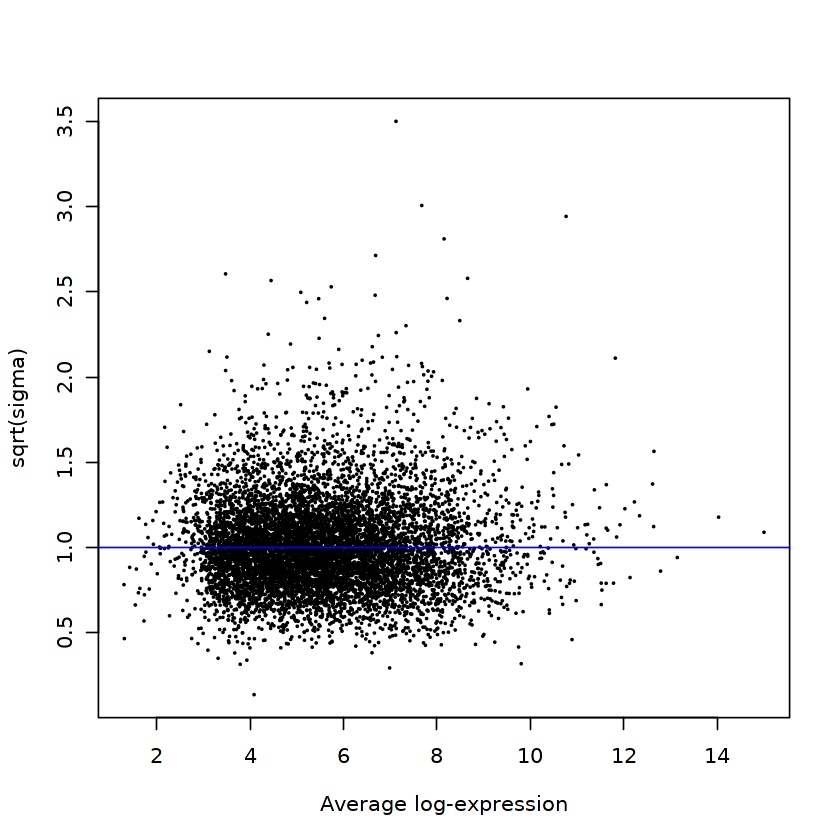

In [28]:
plotSA(overall_model)

In [29]:
dev.off()

pdf 
  3

In [30]:
topTable(overall_model, coef=ncol(design))
# topTable: Extract a table of the top-ranked genes from a linear model fit; selecting the top-ranked genes for any given contrast

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tpr_TRINITY_DN15350_c0_g5|Tdu_TRINITY_DN16990_c3_g6,14.99818,15.00516,120.3492,1.307698e-16,1.867143e-13,26.39984
Tpr_TRINITY_DN12194_c4_g1|Tdu_TRINITY_DN24973_c6_g2,12.75459,12.78973,121.0213,1.239543e-16,1.867143e-13,26.35774
Tpr_TRINITY_DN10371_c4_g2|Tdu_TRINITY_DN22413_c3_g1,13.19983,13.14825,118.8175,1.479022e-16,1.867143e-13,26.29118
Tpr_TRINITY_DN13224_c2_g2|Tdu_TRINITY_DN21311_c1_g1,11.40224,11.51976,117.6765,1.622757e-16,1.867143e-13,26.14939
Tpr_TRINITY_DN13159_c0_g2|Tdu_TRINITY_DN18363_c1_g1,11.86656,11.62400,116.4078,1.800948e-16,1.867143e-13,26.12808
Tpr_TRINITY_DN13584_c4_g1|Tdu_TRINITY_DN21118_c5_g1,11.85058,11.78201,116.1814,1.834964e-16,1.867143e-13,26.11784
Tpr_TRINITY_DN11928_c4_g3|Tdu_TRINITY_DN20996_c3_g2,11.56988,11.53301,115.4260,1.953689e-16,1.867143e-13,26.06927
Tpr_TRINITY_DN11525_c2_g3|Tdu_TRINITY_DN17060_c5_g3,10.69755,10.89290,114.6895,2.077664e-16,1.867143e-13,25.97213
Tpr_TRINITY_DN11314_c4_g8|Tdu_TRINITY_DN17197_c0_g1,11.52005,11.51837,112.4318,2.515132e-16,1.867143e-13,25.93856


In [31]:
top=topTable(overall_model, sort="none", n=Inf, coef=ncol(design))
# Toptable output for all probes in original (unsorted) order can be obtained by topTable(fit,sort="none",n=Inf)

In [32]:
write.table(top, "DE_overall_model_min10_3rep.txt", sep="\t", quote=F, row.names = TRUE)

In [33]:
print(summary(top))
# logFC: log2-fold-change

     logFC            AveExpr             t              P.Value        
 Min.   :-0.8917   Min.   : 1.297   Min.   : -1.587   Min.   :0.000000  
 1st Qu.: 4.3594   1st Qu.: 4.323   1st Qu.: 15.414   1st Qu.:0.000000  
 Median : 5.4163   Median : 5.406   Median : 25.772   Median :0.000000  
 Mean   : 5.5804   Mean   : 5.582   Mean   : 30.468   Mean   :0.002563  
 3rd Qu.: 6.6834   3rd Qu.: 6.627   3rd Qu.: 41.686   3rd Qu.:0.000000  
 Max.   :14.9982   Max.   :15.005   Max.   :121.021   Max.   :0.959532  
   adj.P.Val               B         
 Min.   :0.0000000   Min.   :-6.395  
 1st Qu.:0.0000000   1st Qu.: 9.352  
 Median :0.0000000   Median :14.114  
 Mean   :0.0025695   Mean   :13.553  
 3rd Qu.:0.0000001   3rd Qu.:18.459  
 Max.   :0.9595324   Max.   :26.400  


In [34]:
contrast.matrix = makeContrasts(contrasts=c("trtTdu-trtTpr"), levels=design)
# makeContrasts: Construct the contrast matrix corresponding to specified contrasts of a set of parameters

In [35]:
fit2 = contrasts.fit(fit, contrast.matrix)
# contrasts.fit: Given a linear model fit to microarray data, compute estimated coefficients and standard errors for a given set of contrasts.

In [36]:
fit2 = eBayes(fit2)

In [37]:
topTable(fit2, coef=ncol(contrast.matrix))
top=topTable(fit2, sort="none", n=Inf, coef=ncol(contrast.matrix))
write.table(top, "DE_Tdu_Tpr_min10_3rep.txt", sep="\t", quote=F, row.names = TRUE)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tpr_TRINITY_DN10564_c0_g1|Tdu_TRINITY_DN16653_c0_g1,5.124859,8.203873,19.40735,4.912383e-09,4.051733e-05,11.353520
Tpr_TRINITY_DN12451_c1_g4|Tdu_TRINITY_DN22402_c2_g3,-3.301126,8.579217,-17.37553,1.385067e-08,5.712015e-05,10.480281
Tpr_TRINITY_DN12160_c1_g3|Tdu_TRINITY_DN16869_c3_g1,-2.161163,7.594352,-13.77176,1.196104e-07,1.217196e-04,8.341796
Tpr_TRINITY_DN10137_c4_g1|Tdu_TRINITY_DN22038_c0_g4,-2.930415,7.224888,-13.50671,1.429848e-07,1.217196e-04,8.171281
Tpr_TRINITY_DN10835_c3_g2|Tdu_TRINITY_DN19567_c0_g4,-2.582995,6.923468,-13.33850,1.604009e-07,1.217196e-04,8.057938
Tpr_TRINITY_DN14835_c1_g1|Tdu_TRINITY_DN21687_c1_g1,2.654638,6.671381,13.22967,1.729054e-07,1.217196e-04,7.979006
Tpr_TRINITY_DN11894_c0_g1|Tdu_TRINITY_DN15151_c0_g1,3.136986,6.429151,13.14236,1.837128e-07,1.217196e-04,7.900667
Tpr_TRINITY_DN11017_c3_g4|Tdu_TRINITY_DN24232_c0_g1,-2.257986,6.941019,-13.08029,1.918470e-07,1.217196e-04,7.878619
Tpr_TRINITY_DN10604_c3_g3|Tdu_TRINITY_DN18047_c0_g1,2.596353,6.663675,12.96852,2.075099e-07,1.222530e-04,7.801064
